In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [162]:
device_failure = pd.read_csv("device_failure.csv")
device_failure.head()

,date,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure
0,15001,S1F01085,215630672,56,0,52,6,407438,0,0,7,0
1,15001,S1F0166B,61370680,0,3,0,6,403174,0,0,0,0
2,15001,S1F01E6Y,173295968,0,0,0,12,237394,0,0,0,0
3,15001,S1F01JE0,79694024,0,0,0,6,410186,0,0,0,0
4,15001,S1F01R2B,135970480,0,0,0,15,313173,0,0,3,0


In [143]:
#First, I create a dataframe that only has the rows where "failure" is 1 (device failed), because I'm going to use it
failed_devices = device_failure[device_failure["failure"] == 1]

In [126]:
##How many devices failed?

#I keep the column I'm interested in
amount_failed_devices = failed_devices[["device"]]

#Then, I drop the duplicated rows on the device id ("device") in order to get the failed devices only once.

amount_failed_devices.drop_duplicates("device").count()

#The amount of devices that failed is 106.

device    106
dtype: int64

In [151]:
##How often do they fail?

#I calculate the mean of the failure per device and multiply it for 100, that will tell me porcentaje of failure of each device.
mean_device_failure = device_failure.groupby("device")["failure"].apply(lambda x: x.mean() * 100).reset_index()

#I keep the devices that failed
mean_device_failure = mean_device_failure[mean_device_failure["failure"] != 0]

#Change the column name
mean_device_failure.rename(columns = {'failure': 'failure in %'}, inplace=True)
mean_device_failure

,device,failure in %
8,S1F023H2,5.263158
27,S1F03YZM,0.465116
48,S1F09DZQ,0.502513
67,S1F0CTDN,14.285714
78,S1F0DSTY,2.222222
83,S1F0F4EB,0.787402
93,S1F0GG8X,5.555556
98,S1F0GJW3,1.315789
99,S1F0GKFX,0.854701
100,S1F0GKL6,0.751880


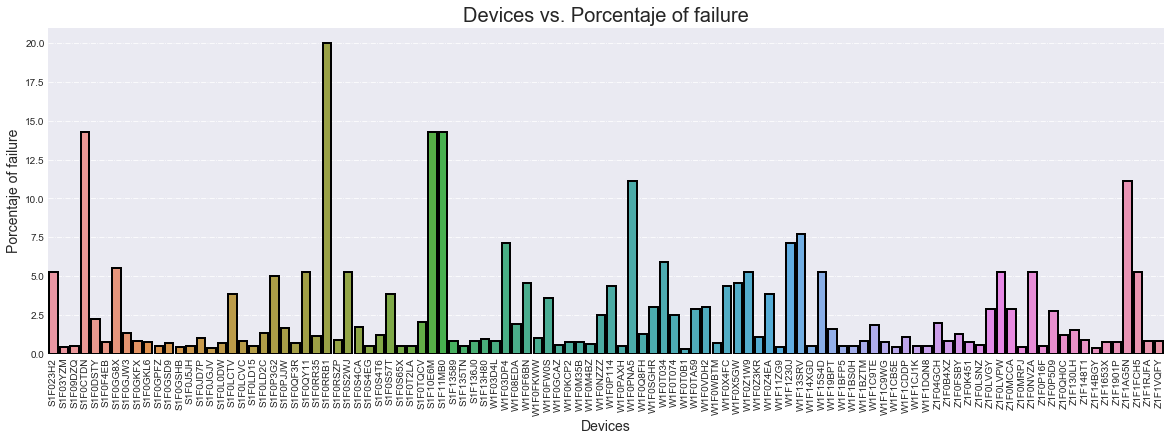

In [167]:
#Plot of the failing devices.
ax = sns.barplot(x = mean_device_failure['device'], y = mean_device_failure['failure in %'], edgecolor = (0,0,0), linewidth = 2)

ax.set_title('Devices vs. Porcentaje of failure', fontsize = 20)
ax.set_ylabel('Porcentaje of failure', fontsize = 14)
ax.set_xlabel('Devices', fontsize = 14)
ax.grid(True, which = 'major', linestyle = '-.', axis = 'y' )
ax.set_xticklabels(mean_device_failure['device'], rotation = 90)

ax.figure.set_figheight(6)
ax.figure.set_figwidth(20)

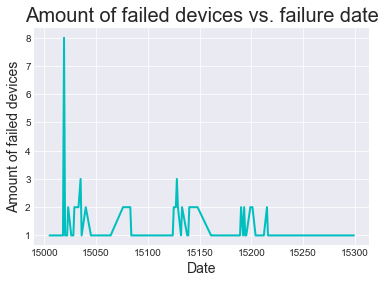

<Figure size 720x1080 with 0 Axes>

In [160]:
##When do they fail?

#I group the failed devices by date
failed_devices_by_date = failed_devices.groupby("date").count().reset_index()

#Plot the amount of failed devices by date
sns.set_style("darkgrid")
plt.plot( 'date', 'device', data=failed_devices_by_date, color='c', linewidth = 2)

plt.title("Amount of failed devices vs. failure date", size=20)
plt.xlabel("Date", size = 14)
plt.ylabel("Amount of failed devices", size = 14)
plt.figure(figsize=(10,15))

plt.show()